# Computing hybrid transforms on cubical complexes using Python

**Author :** H. Passe


In [3]:
import embedded_cubical_complex as embedded_cc
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
import numpy as np
from pylab import cm,imshow,colorbar,show

## Hybrid transform from a numpy array

Let's create a cubical complex from a numpy array :

In [4]:
data = np.array([[0,1,0],[1,1,1],[0,0,0]])
cub_cplx = embedded_cc.EmbeddedComplex(data)
cub_cplx.print_filtration()

Filtration : 
[0, 0, 0, 0, 0, 0, 0, ]
0, 0, 0, 0, 0, 0, 0, ]
0, 0, 0, 0, 0, 0, 0, ]
1, 1, 1, 1, 1, 1, 1, ]
0, 0, 0, 1, 0, 0, 0, ]
0, 0, 0, 1, 0, 0, 0, ]
0, 0, 0, 1, 0, 0, 0, ]
]


The `cub_cplx` object has class `EmbeddedComplex`. The corresponding complex has sizes `data.shape`. Let's now define some random directions to compute the transform.

In [5]:
directions = np.random.randn(5,2)
print(directions)

[[-1.58378237  0.49547691]
 [ 1.09358142 -1.72978736]
 [-1.594154   -0.12727414]
 [ 0.14263725  2.52239742]
 [-0.03946905 -0.20078394]]


Now we can compute hybrid transform in each direction :

In [6]:
ht = cub_cplx.compute_hybrid_transform("exp",directions)
print(ht)

[ 1.23137967  0.90094557  1.19691667 -0.3612032   0.03004075]


The object `ht` is a `numpy.ndarray`. For each `i`, `ht[i]` is the hybrid transform of `cub_cplx` in direction `directions[i]` with $K : t \in \mathbb{R} \rightarrow \exp(t)$ as kernel's antiderivative. Other kernels are available, the the documentation for further information.

## Plotting hybrid transforms from an image of a dataset

In this section we are going to plot the module of the hybrid transform of an image with the kernel $\kappa : t \in \mathbb{R} \rightarrow \exp(it)$. To demonstrate it we use an image from the [DRIVE](https://drive.grand-challenge.org/) dataset.

First we load an image, convert it to a grayscale image and then to a `numpy.ndarray` :

In [7]:
raw_img = Image.open('test_images/27_manual1.png')
gray_img = ImageOps.grayscale(raw_img)
array_img = np.asarray(gray_img)
plt.imshow(gray_img)

FileNotFoundError: [Errno 2] No such file or directory: 'image.png'

We use it to create a cubical complex :

In [7]:
img_cplx = embedded_cc.EmbeddedComplex(array_img)

Then, we create the array of points where we want to plot :

In [8]:
start_x, end_x, num_x = -100, 100, 200
start_y, end_y, num_y = -100, 100, 200

X = np.linspace(start_x, end_x, num_x)
Y = np.linspace(start_y, end_y, num_y)
directions = np.transpose([np.repeat(X, num_y), np.tile(Y, num_x)])

We compute the hybrid transform with kernels $\cos$ and $\sin$. Then we compute the module of our transform.

In [9]:
C = img_cplx.compute_hybrid_transform("cos", directions)
S = img_cplx.compute_hybrid_transform("sin", directions)
ht = np.add(np.square(C),np.square(S))

(Optional) : We normalize our transform :

In [10]:
normalize = 1
if normalize:
    scalar_pdt = np.linalg.norm(directions, axis=1)
    ht = np.divide(ht,scalar_pdt)

Finally we reshape the `ht` array and we plot is :

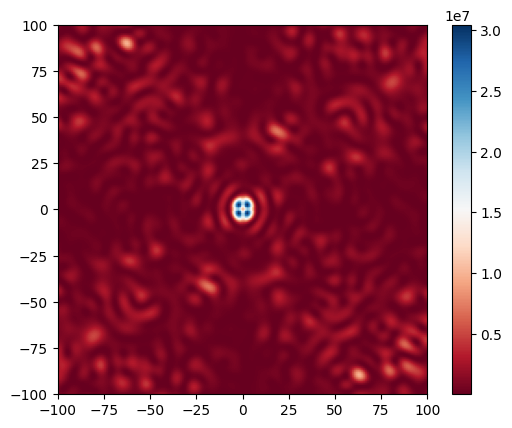

In [11]:
ht = np.flip(np.transpose(np.reshape(ht, (num_x,num_y))), axis=0)
fig = imshow(ht,extent=[start_x,end_x,start_y,end_y],cmap=cm.RdBu)
colorbar(fig)
show()